In [4]:
import requests
from bs4 import BeautifulSoup

URL = "https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
# soup

In [5]:
# import tweepy
import tweepy as tw
# your Twitter API key and API secret
my_api_key = "YLevgj09NJ7EY4EVwjlUwwA3g"
my_api_secret = "keGbAP1gT7dxbAYcMzQDbGZfhnU2d0BbJn4dbhgRGtspUxKBUZ"
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [70]:
search_query = "#fooddesert" #GMOs

In [73]:
# get tweets from the API
tweets = tw.Cursor(api.search_tweets,
              q=search_query,
              lang="en",
              since="2018-09-16").items(400)

# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


Total Tweets fetched: 219


In [74]:
import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

/var/folders/4m/jxk5_ydd4zl7c_t8ktc70vnw0000gn/T/ipykernel_86457/1880315750.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,


In [75]:
# show the dataframe
tweets_df

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,LiV,757,break the cycle.eye choose happy. sublime. mul...,False,2022-07-26 01:05:26+00:00,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...,"[dc, ward8, fooddesert, indigenous, farming, u...",Twitter Web App
1,𝚖𝚎𝚎𝚙 ᰔᩚ,they/s 18 pan 🍰 || (infp-a),『 𖦹₊˚⊙♐︎🌙♏︎ ↑♌︎•°๑ 』 ⋆｡ﾟ☁︎ ｡⋆ೄྀ࿐ ˊˎ-·˚ ༘₊· ͟͟...,False,2022-07-25 23:59:36+00:00,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...,"[dc, ward8, fooddesert, indigenous, farming, u...",Twitter for Android
2,🎉 follow @greenwithin 🌷,dmv,the og 💚 plant-based 16 years. afro-indigenous...,False,2022-07-25 23:47:22+00:00,RT @plantbasedvibes: 👩🏽‍🌾 it's the 3 sisters g...,"[dc, ward8, fooddesert, indigenous, farming, u...",Twitter for iPhone
3,Gail Chambers,,,False,2022-07-25 20:01:11+00:00,RT @ElmiraMarket: ‼️ Elmira Alert ‼️ | Media 📺...,None,Twitter for Android
4,The Buffalo News,"Buffalo, NY","News alerts, headlines & more from WNY’s large...",True,2022-07-25 17:58:12+00:00,RT @JanetBfloNext: Efforts to address Buffalo'...,None,TweetDeck
...,...,...,...,...,...,...,...,...
214,Adam Wright,,I help people get fit and escape toxic diet cu...,False,2022-07-16 03:59:26+00:00,Reply to “choice” is the only factor when it c...,"[nutrition, fooddesert, dunningkruger, health]",RepurposeIO
215,NewsVoyUS,"Somerville, MA",NewsVoy makes it easy to curate @WordPress or ...,False,2022-07-15 21:42:02+00:00,U.S. Treasury Secretary Janet Yellen on Friday...,None,NewsVoy
216,NewsVoyUS,"Somerville, MA",NewsVoy makes it easy to curate @WordPress or ...,False,2022-07-15 21:02:12+00:00,U.S. Treasury Secretary Janet Yellen on Friday...,None,NewsVoy
217,in2spirit 🌻,"Los Angeles, CA",Many voices-one message.\nWe are one in spirit...,False,2022-07-15 20:42:51+00:00,RT @FoPRR: Do something wonderful tonight! Ord...,"[food, Lakota]",Twitter for Android


In [79]:
import numpy as np

In [81]:
a1 = np.array(tweets_df['user_location'])
len(a1)

219

In [83]:
a2 = np.unique(np.array(tweets_df['user_location']))
len(a2)
a2

array(['',
       '14 she/it/pika\nwhite tma\ndemigirl lesbian\nablebodied perisex',
       '14yo perisex ablebodied TME', '19 she/her/hers BLM',
       '19 • bi • dominican', '20', '28 Kitten ||minors dni|| 21+ ',
       '757', '@thegumbeauxpot', 'An insignificant rock in space',
       'Apache Junction, AZ', 'Atlanta, GA', 'Bad Wildbad, Deutschland',
       'Ballston Spa, NY', 'Black lesbian, tme, minor',
       'Bradford, England', 'Brooklyn, New York', 'Bucureşti, România',
       'Buffalo, NY', 'Charlotte Place', 'Chicago, IL',
       'Clear Lake, Iowa', 'DC in body/Chicago in spirit',
       'DNI: Proshippers, TERFs', 'EC', 'Earth',
       'Edgewater, Chicago, USA', 'Everywhere',
       'Fae, sae, tey, zey, zhe, xhe, xe, ze, ve ++│♎︎\nEng/Pt-br || 🏳\u200d🌈🏳️\u200d⚧️ ⚧ ⚲ ⚣ || BTLM + ACAB\n🇧🇷 || Masc and fem terms preffered!!',
       'Fifth spruce on the far left', 'FifthWard, Houston, TX',
       'Florida', 'Florida, USA', 'Fly-over states', 'Fort Lauderdale',
       'Georgia Pea

In [84]:
tweets_df.size

1752

In [85]:
tweets_df.to_csv('Food-Deserts-data.csv')

(-1.0, 1.0)

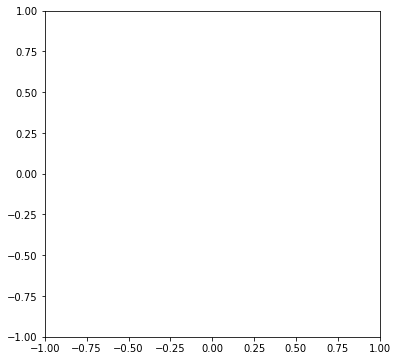

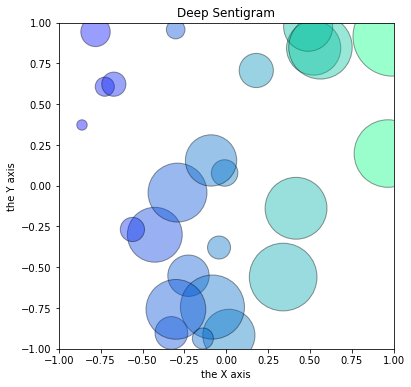

In [64]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# create data
x = np.random.random(25)
y = np.random.rand(25)
z = x+np.random.rand(25)

for i in range(len(x)):
    x[i] = -1 + (x[i] * (1-(-1)))
for i in range(len(y)):
    y[i] = -1 + (y[i] * (1-(-1)))
# for i in range(len(z)):
#     z[i] = -1 + (z[i] * (1-(-1)))

z=z*z
 
# first, we'll create a new figure and axis object

fig, ax = plt.subplots(figsize=(6,6))

# set the number of rows and cols for our table

ax.set_ylim(-1, 1)
ax.set_xlim(0, 1)

# Change color with c and transparency with alpha. 
# I map the color to the X axis value.
plt.scatter(x, y, s=z*2000, c=x, cmap="winter", alpha=0.4, edgecolors="black", linewidth=1)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("Sentiment")
plt.title("Deep Sentigram")

# Show the graph
plt.show()

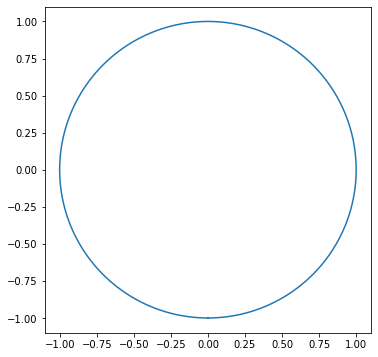

In [66]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(6,6))

ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)
plt.plot(np.sin(theta), np.cos(theta))

plt.show()

In [97]:
import mpl_toolkits.mplot3d

ImportError: cannot import name 'basemap' from 'mpl_toolkits' (unknown location)

In [89]:
import numpy as np
from mpl_toolkits import *
import matplotlib.pyplot as plt
from datetime import datetime
# miller projection
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

NameError: name 'Basemap' is not defined

In [98]:
from build_and_train import *

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sudharsangopalakrishnan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
